# Chapter 04. Basic Pytorch

## 4.1 Tensor

### 4.1.1 various tensor

In [2]:
import torch
import numpy as np

x = torch.empty(5,4)
print(x)

print(torch.ones(3,3))
print(torch.zeros(2))
print(torch.rand(5,6))

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([0., 0.])
tensor([[0.0274, 0.6068, 0.7851, 0.8941, 0.7798, 0.1654],
        [0.7789, 0.1817, 0.3063, 0.4638, 0.6721, 0.1706],
        [0.3536, 0.7433, 0.9957, 0.1980, 0.8760, 0.4810],
        [0.4269, 0.3249, 0.4075, 0.1140, 0.3921, 0.5282],
        [0.4401, 0.0026, 0.2920, 0.3826, 0.2877, 0.1841]])


### 4.1.2 Create list and numpy array to tensor

In [4]:
l = [13, 4] # Create list
r = np.array([4, 56, 7]) # Create numpy array
print(torch.tensor(l)) # Convert list to tensor
print(torch.tensor(r)) # Convert numpy array to tensor

tensor([13,  4])
tensor([ 4, 56,  7], dtype=torch.int32)


### 4.1.3 Size, Type and Calculation of Tensor

In [7]:
print(x.size())
print(x.size()[1])

print(type(x))

x = torch.rand(2,2) # (2,2) random matrix
y = torch.rand(2,2)

print(x+y)
print(torch.add(x,y))
print(y.add(x)) # Same result for three code

print(y.add_(x)) # in-place way w/ Change y value

torch.Size([5, 4])
4
<class 'torch.Tensor'>
tensor([[0.8996, 1.2702],
        [1.0372, 0.3771]])
tensor([[0.8996, 1.2702],
        [1.0372, 0.3771]])
tensor([[0.8996, 1.2702],
        [1.0372, 0.3771]])


### 4.1.4 Convert size of tensor

In [9]:
x = torch.rand(8,8)
print(x.size())

a = x.view(64) # view function change the size as 8 * 8 -> 64
print(a.size())
print(a)

b = x.view(-1,4,4) # '-1' is to change the initial size as 8 * 8 -> -1*4*4 namely, 4*4*4
print(b.size())
print(b)

torch.Size([8, 8])
torch.Size([64])
tensor([0.6098, 0.3146, 0.3551, 0.8492, 0.3711, 0.3291, 0.4339, 0.6547, 0.1967,
        0.8876, 0.3214, 0.4669, 0.4434, 0.1212, 0.8681, 0.8509, 0.6872, 0.0374,
        0.1727, 0.8996, 0.2728, 0.3954, 0.7406, 0.9763, 0.7300, 0.0083, 0.0882,
        0.7150, 0.4146, 0.5748, 0.2260, 0.2644, 0.3615, 0.6950, 0.0292, 0.5214,
        0.2823, 0.5746, 0.1954, 0.6395, 0.9675, 0.7774, 0.8656, 0.8506, 0.9122,
        0.1154, 0.3965, 0.4554, 0.6068, 0.4787, 0.9474, 0.1447, 0.3091, 0.8877,
        0.3444, 0.6581, 0.0929, 0.8488, 0.1539, 0.5767, 0.7213, 0.4488, 0.8142,
        0.3410])
torch.Size([4, 4, 4])
tensor([[[0.6098, 0.3146, 0.3551, 0.8492],
         [0.3711, 0.3291, 0.4339, 0.6547],
         [0.1967, 0.8876, 0.3214, 0.4669],
         [0.4434, 0.1212, 0.8681, 0.8509]],

        [[0.6872, 0.0374, 0.1727, 0.8996],
         [0.2728, 0.3954, 0.7406, 0.9763],
         [0.7300, 0.0083, 0.0882, 0.7150],
         [0.4146, 0.5748, 0.2260, 0.2644]],

        [[0.3615,

### 4.1.5 Convert tensor to numpy array

In [10]:
x = torch.rand(8,8)
y = x.numpy()
type(y)

numpy.ndarray

### 4.1.6 Convert one element tensors to Python scalars

In [11]:
x= torch.ones(1)
print(x)

print(x.item())

tensor([1.])
1.0


## 4.2 Backpropagation

### 4.2.1 Gradient tensor

In [13]:
import torch
x = torch.ones(2,2, requires_grad=True)
y = x+1
z = 2*y**2
r = z.mean()
print("Result: ", r)

Result:  tensor(8., grad_fn=<MeanBackward0>)


In [14]:
r.backward()
print(x.grad)

tensor([[2., 2.],
        [2., 2.]])


### 4.2.2 Autograd

In [16]:
import torch
from matplotlib import pyplot as plt

x = torch.FloatTensor(range(5)).unsqueeze(1)
y = 2*x + torch.rand(5,1)
num_features = x.shape[1] # 변수의 개수 저장

In [21]:
w = torch.randn(num_features, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

In [24]:
learning_rate = 1e-3
optimizer = torch.optim.SGD([w,b], lr=learning_rate)

In [26]:
loss_stack = []
for epoch in range(1001):
	optimizer.zero_grad()
	y_hat = torch.matmul(x,w)+b
	loss = torch.mean((y_hat-y)**2)
	loss.backward()
	optimizer.step()
	loss_stack.append(loss.item())

	if epoch % 100 == 0:
		print(f'Epoch {epoch}:{loss.item()}')

Epoch 0:14.836282730102539
Epoch 100:1.154869794845581
Epoch 200:0.22157065570354462
Epoch 300:0.14751069247722626
Epoch 400:0.13253605365753174
Epoch 500:0.12266181409358978
Epoch 600:0.11412887275218964
Epoch 700:0.10657171159982681
Epoch 800:0.09986621886491776
Epoch 900:0.0939154177904129
Epoch 1000:0.08863456547260284


In [27]:
with torch.no_grad():
    y_hat = torch.matmul(x, w)+b

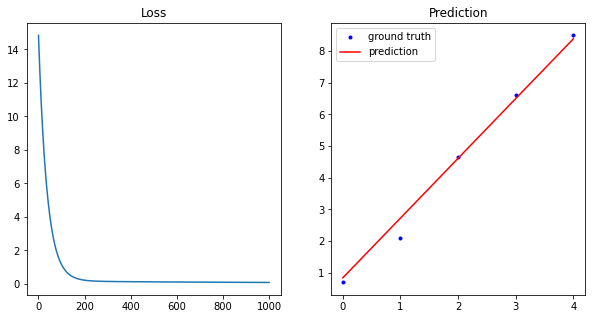

In [28]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(loss_stack)
plt.title("Loss")
plt.subplot(122)
plt.plot(x, y,'.b')
plt.plot(x, y_hat, 'r-')
plt.legend(['ground truth', 'prediction'])
plt.title("Prediction")
plt.show()

## 4.3 Load Dataset

### 4.3.1 Using pytorch dataset

In [29]:
import torch
import torchvision
import torchvision.transforms as tr
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt

In [30]:
transf = tr.Compose([tr.Resize(16), tr.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root='./data',train=True, download=True, transform=transf)
testset = torchvision.datasets.CIFAR10(root='./data',train=False, download=True, transform=transf)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [45]:
print(trainset)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=16, interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )


In [46]:
trainset[0]

(tensor([[[0.1137, 0.2039, 0.4118, 0.5176, 0.5098, 0.4588, 0.4824, 0.4863,
           0.4824, 0.4863, 0.5098, 0.5176, 0.5490, 0.5725, 0.5490, 0.5216],
          [0.1333, 0.3020, 0.4510, 0.4627, 0.4510, 0.4431, 0.4667, 0.4902,
           0.4667, 0.4745, 0.5137, 0.5176, 0.5020, 0.5176, 0.4824, 0.4275],
          [0.2824, 0.4392, 0.4980, 0.4667, 0.4627, 0.4588, 0.4353, 0.4196,
           0.4000, 0.4000, 0.4431, 0.4824, 0.5216, 0.4667, 0.3647, 0.2549],
          [0.4392, 0.5020, 0.5137, 0.5020, 0.5059, 0.4549, 0.3137, 0.3059,
           0.5294, 0.3647, 0.3176, 0.4431, 0.5333, 0.4824, 0.3961, 0.3647],
          [0.5569, 0.5412, 0.4980, 0.5059, 0.5020, 0.3725, 0.2588, 0.3608,
           0.6392, 0.5059, 0.3765, 0.3608, 0.4667, 0.5216, 0.4941, 0.5020],
          [0.5882, 0.5686, 0.5137, 0.4784, 0.4784, 0.4471, 0.4980, 0.5804,
           0.6078, 0.6118, 0.6549, 0.5333, 0.4824, 0.5255, 0.5294, 0.5216],
          [0.5765, 0.5608, 0.4706, 0.3569, 0.4275, 0.6667, 0.7373, 0.8157,
           0.8275, 

In [47]:
trainset[0][0]

tensor([[[0.1137, 0.2039, 0.4118, 0.5176, 0.5098, 0.4588, 0.4824, 0.4863,
          0.4824, 0.4863, 0.5098, 0.5176, 0.5490, 0.5725, 0.5490, 0.5216],
         [0.1333, 0.3020, 0.4510, 0.4627, 0.4510, 0.4431, 0.4667, 0.4902,
          0.4667, 0.4745, 0.5137, 0.5176, 0.5020, 0.5176, 0.4824, 0.4275],
         [0.2824, 0.4392, 0.4980, 0.4667, 0.4627, 0.4588, 0.4353, 0.4196,
          0.4000, 0.4000, 0.4431, 0.4824, 0.5216, 0.4667, 0.3647, 0.2549],
         [0.4392, 0.5020, 0.5137, 0.5020, 0.5059, 0.4549, 0.3137, 0.3059,
          0.5294, 0.3647, 0.3176, 0.4431, 0.5333, 0.4824, 0.3961, 0.3647],
         [0.5569, 0.5412, 0.4980, 0.5059, 0.5020, 0.3725, 0.2588, 0.3608,
          0.6392, 0.5059, 0.3765, 0.3608, 0.4667, 0.5216, 0.4941, 0.5020],
         [0.5882, 0.5686, 0.5137, 0.4784, 0.4784, 0.4471, 0.4980, 0.5804,
          0.6078, 0.6118, 0.6549, 0.5333, 0.4824, 0.5255, 0.5294, 0.5216],
         [0.5765, 0.5608, 0.4706, 0.3569, 0.4275, 0.6667, 0.7373, 0.8157,
          0.8275, 0.8118, 0.7843

In [48]:
trainset[0][1]

6

In [49]:
trainloader = DataLoader(trainset, batch_size = 50, shuffle=True)
testloader = DataLoader(testset, batch_size=50, shuffle=False)

In [51]:
len(trainloader)

1000

In [52]:
images, labels = iter(trainloader).next()
print(images.size())

torch.Size([50, 3, 16, 16])


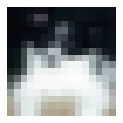

In [60]:
oneshot = images[1].permute(1,2,0).numpy()
plt.figure(figsize=(2,2))
plt.imshow(oneshot)
plt.axis("off")
plt.show()

### 4.3.2 Using pytorch dataset(2)

In [ ]:
transf = tr.Compose([tr.Resize(128), tr.ToTensor()])
trainset = torchvision.datasets.ImageFolder(root='./class',transform=transf)
testset = DataLoader(trainset, batch_size=1, shuffle=False)

### 4.3.3 Load unorganized custom dataset

In [64]:
from torch.utils.data import Dataset

train_images = np.random.randint(256, size=(100, 32, 32, 3))/255
train_labels = np.random.randint(2, size=(100,1))

class TensorData(Dataset):

    def __init__(self, x_data, y_data):
        self.x_data = torch.FloatTensor(x_data)
        self.x_data = self.x_data.permute(0,3,1,2)
        self.y_data = torch.LongTensor(y_data)
        self.len = self.y_data.shape[0]

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len

In [65]:
train_data = TensorData(train_images, train_labels)
train_loader = DataLoader(train_data, batch_size = 10, shuffle=True)

### 4.3.4 Using custom dataset and custom preprocessing

In [67]:
class ToTensor:
    def __call__(self, sample):
        inputs, labels = sample
        inputs = torch.FloatTensor(inputs)
        inputs = inputs.permute(2,0,1)
        return inputs, torch.LongTensor(labels)

In [70]:
class CutOut:

    def __init__(self, ratio=.5):
        self.ratio = int(1/ratio)

    def __call__(self, sample):
        inputs, labels = sample
        active = int(np.random.randint(0, self.ratio, 1))

        if active == 0:
            _, w, h = inputs.size()
            min_len = min(w, h)
            box_size = int(min_len//4)
            idx = int(np.random.randint(0, min_len-box_size, 1))
            inputs[:, idx:idx+box_size, idx:idx+box_size]=0

        return inputs, labels

In [84]:
np.random.randint(0, int(1/0.5), 1)

array([0])

In [88]:
class MyDataset(Dataset):

    def __init__(self, x_data, y_data, transform=None):
        self.x_data = x_data
        self.y_data = y_data
        self.transform = transform
        self.len = len(y_data)
        self.tensor = ToTensor()

    def __getitem__(self, index):
        sample = self.x_data[index], self.y_data[index]

        if self.transform:
            sample = self.transform(sample)
        else:
            sample = self.tensor(sample)
        return sample

    def __len__(self):
        return self.len

In [89]:
trans = tr.Compose([ToTensor(), CutOut()])
dataset1 = MyDataset(train_images, train_labels, transform=trans)
train_loader1 = DataLoader(dataset1, batch_size = 10, shuffle=True)

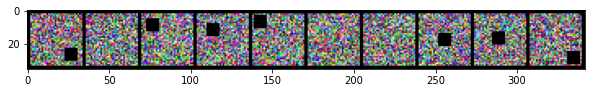

In [91]:
import torchvision
images1, labels1 = iter(train_loader1).next()

def imshow(img):
    plt.figure(figsize=(10, 100))
    plt.imshow(img.permute(1,2,0).numpy())
    plt.show()

imshow(torchvision.utils.make_grid(images1, nrow=10))

### 4.3.5 Using custom dataset and pytorch preprocessing module

In [92]:
class MyTransform:

    def __call__(self, sample):
        inputs, labels = sample
        inputs = torch.FloatTensor(inputs)
        inputs = inputs.permute(2,0,1)
        labels = torch.FloatTensor(labels)

        transf = tr.Compose([tr.ToPILImage(), tr.Resize(128), tr.ToTensor()])
        final_output = transf(inputs)

        return final_output, labels

In [93]:
dataset2 = MyDataset(train_images, train_labels, transform=MyTransform())
train_loader2 = DataLoader(dataset2, batch_size = 10, shuffle = True)

### 4.3.6 Using custom preprocessing and pytorch preprocessing module

In [94]:
class CutOut:

    def __init__(self, ratio = .5):
        self.ratio = int(1/ratio)

    def __call__(self, inputs):
        active = int(np.random.randint(0, self.ratio, 1))

        if active == 0:
            _, w, h = inputs.size()
            min_len = min(w, h)
            box_size = int(min_len//4)
            idx = int(np.random.randint(0, min_len-box_size, 1))
            inputs[:, idx:idx+box_size, idx:idx+box_size] = 0

        return inputs

transf = tr.Compose([tr.Resize(128), tr.ToTensor(), CutOut()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transf)

Files already downloaded and verified


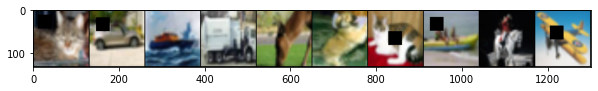

torch.Size([10, 3, 128, 128])


In [96]:
trainloader = DataLoader(trainset, batch_size = 10, shuffle=True)
images, labels = iter(trainloader).next()
imshow(torchvision.utils.make_grid(images, nrow=10))
print(images.size())